In [7]:
import random
import copy

import numpy as np

from numba import jit, njit, cuda, prange

import matplotlib.pyplot as plt

# N-2D Random Walkers With Numpy

In [423]:
generator = np.random.default_rng()
walkers = int(5e3)
n_steps = int(2e3)

In [425]:
steps = generator.random((walkers, n_steps, 2)) - 0.5
steps /= np.abs(steps)

In [426]:
T = np.arange(n_steps + 1)
X = np.insert(np.cumsum(steps, axis=1), 0, 0, axis=1)

In [428]:
x_mean_pos = np.mean(X, axis=0)[:, 0]
y_mean_pos = np.mean(X, axis=0)[:, 1]
mean_squared_dis = np.mean(np.sum(X**2, axis=2), axis=0)

print(f'Mean of Mean Positions At Each Time Step For X = {x_mean_pos.mean()}')
print(f'Mean of Mean Positions At Each Time Step For Y = {y_mean_pos.mean()}')

Mean of Mean Positions At Each Time Step For X = 0.20112503748125934
Mean of Mean Positions At Each Time Step For Y = -0.4910016991504248


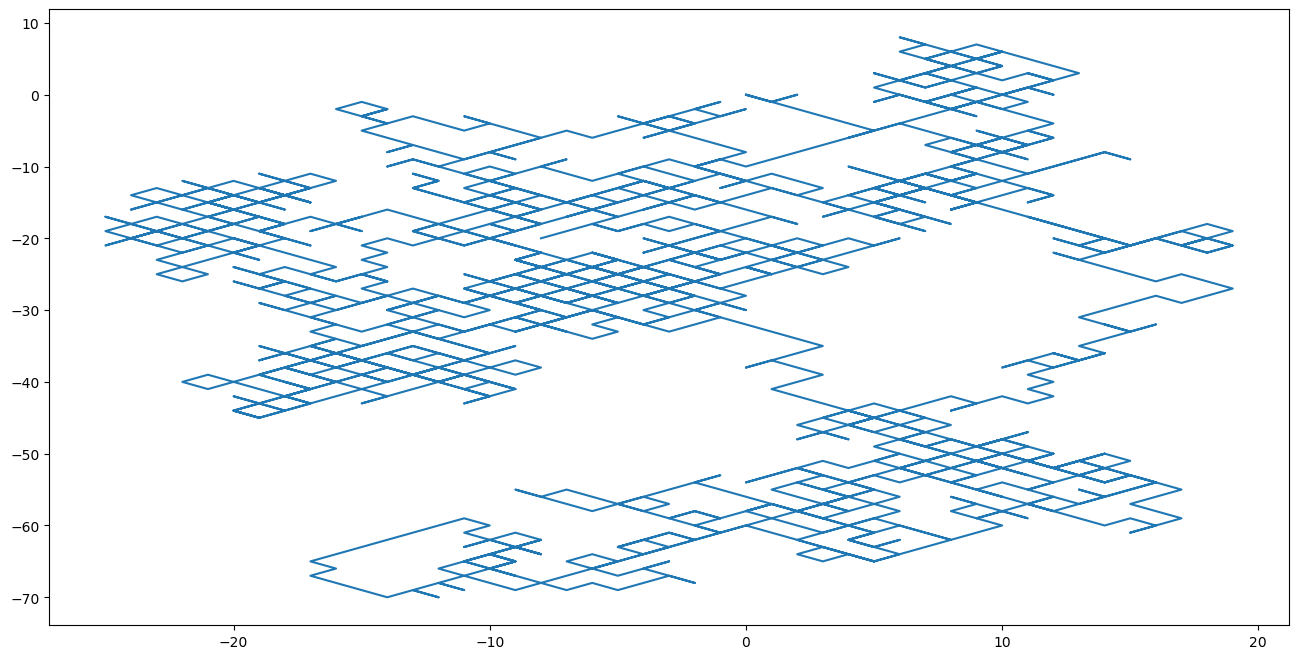

In [430]:
walker_id = 2

plt.figure(figsize = (16, 8))

plt.plot(X[walker_id, :, 0], X[walker_id, :, 1])

plt.show()

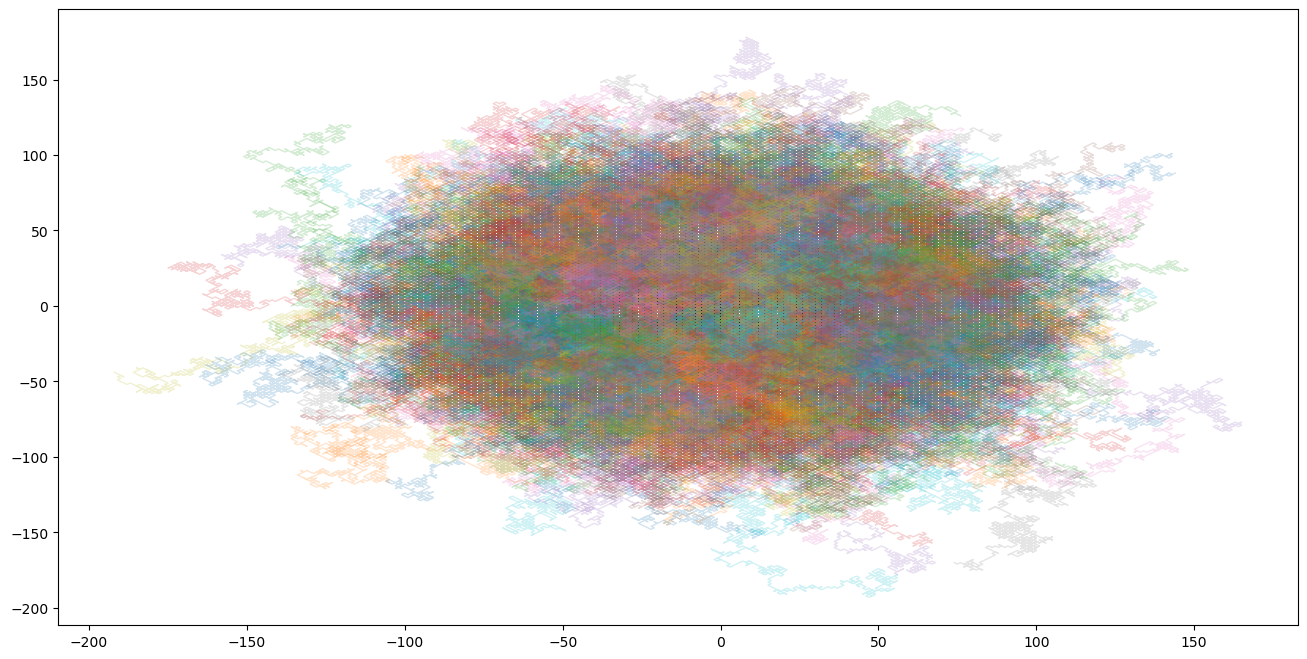

In [432]:
plt.figure(figsize = (16, 8))

for i in range(walkers):
    plt.plot(X[i, :, 0], X[i, :, 1], linewidth=1, alpha=0.2)

plt.show()

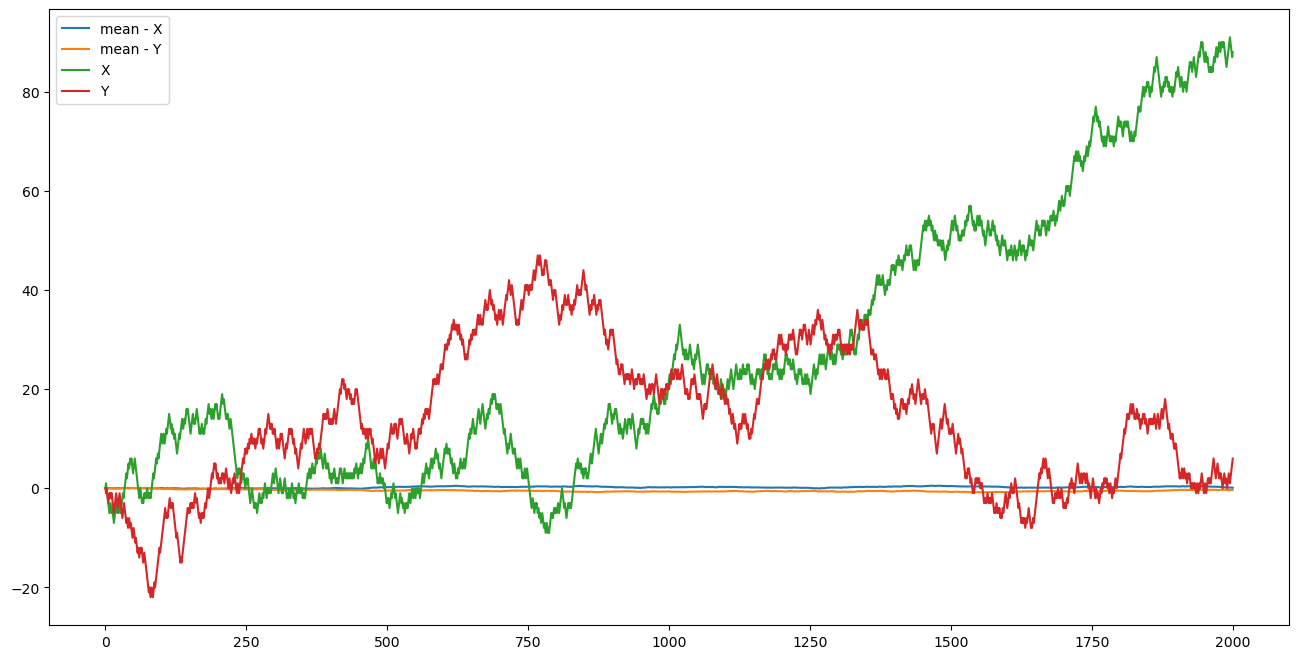

In [434]:
plt.figure(figsize = (16, 8))

plt.plot(T, x_mean_pos, label='mean - X')
plt.plot(T, y_mean_pos, label='mean - Y')

plt.plot(T, X[0, :, 0], label='X')
plt.plot(T, X[0, :, 1], label='Y')

plt.legend()
plt.show()

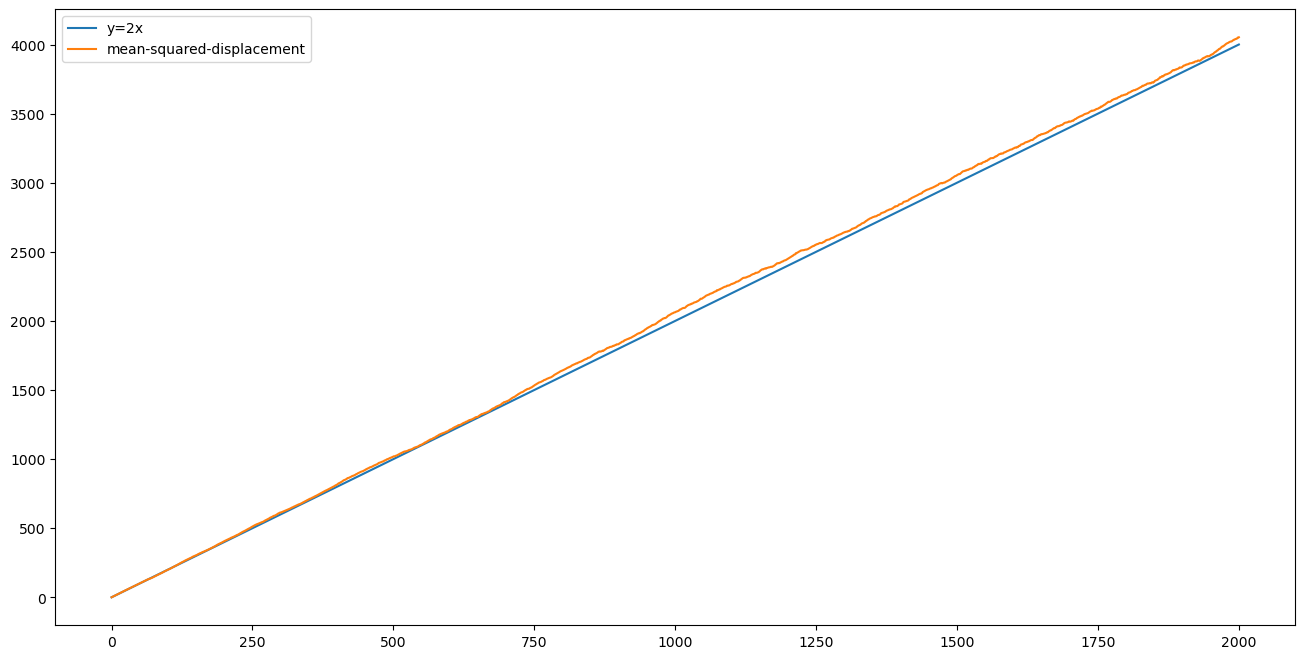

In [435]:
plt.figure(figsize = (16, 8))

plt.plot(T, 2*T, label='y=2x')
plt.plot(T, mean_squared_dis, label='mean-squared-displacement')

plt.legend()
plt.show()

In [436]:
steps_to_reach_zero = np.zeros(walkers)

for i in range(walkers):
    steps_to_reach_zero[i] = np.count_nonzero(np.prod(X[i] == [0, 0], axis=1)) - 1

In [437]:
unique_steps_to_reach_zero = np.unique(steps_to_reach_zero)
appearances_to_reach_zero = np.zeros(len(unique_steps_to_reach_zero))

for i in range(len(unique_steps_to_reach_zero)):
    appearances_to_reach_zero[i] = len(steps_to_reach_zero[steps_to_reach_zero == unique_steps_to_reach_zero[i]])

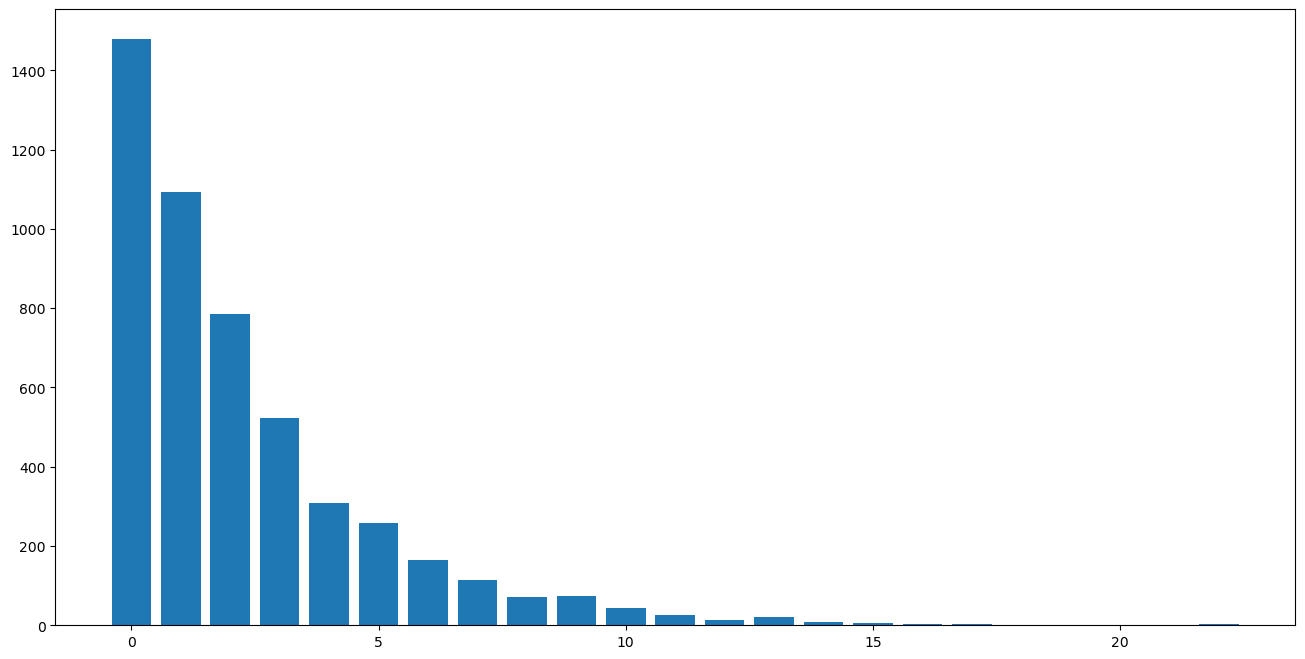

In [438]:
plt.figure(figsize = (16, 8))

plt.bar(x=unique_steps_to_reach_zero, height=appearances_to_reach_zero)

plt.show()

# N-2D Random Walkers With Python & Numba

In [529]:
#@jit(target_backend='cuda') #for nvidia graphic card
@jit
def random_walker_2d(walkers, steps):

    walkers = int(walkers)
    steps = int(steps)
    
    T = [i for i in range(steps + 1)]
    
    random_walks = []
    for j in range(walkers):
    
        X = [0]*(steps+1)
        Y = [0]*(steps+1)
        
        for i in range(steps):
            X_rand = random.uniform(0, 1) - 0.5
            X_rand /= abs(X_rand)
    
            Y_rand = random.uniform(0, 1) - 0.5
            Y_rand /= abs(Y_rand)
        
            X[i+1] = X[i] + X_rand
            Y[i+1] = Y[i] + Y_rand
        
        random_walks.append([X, Y])

    return random_walks

In [539]:
random_walk = random_walker_2d(5e3, 2e4)

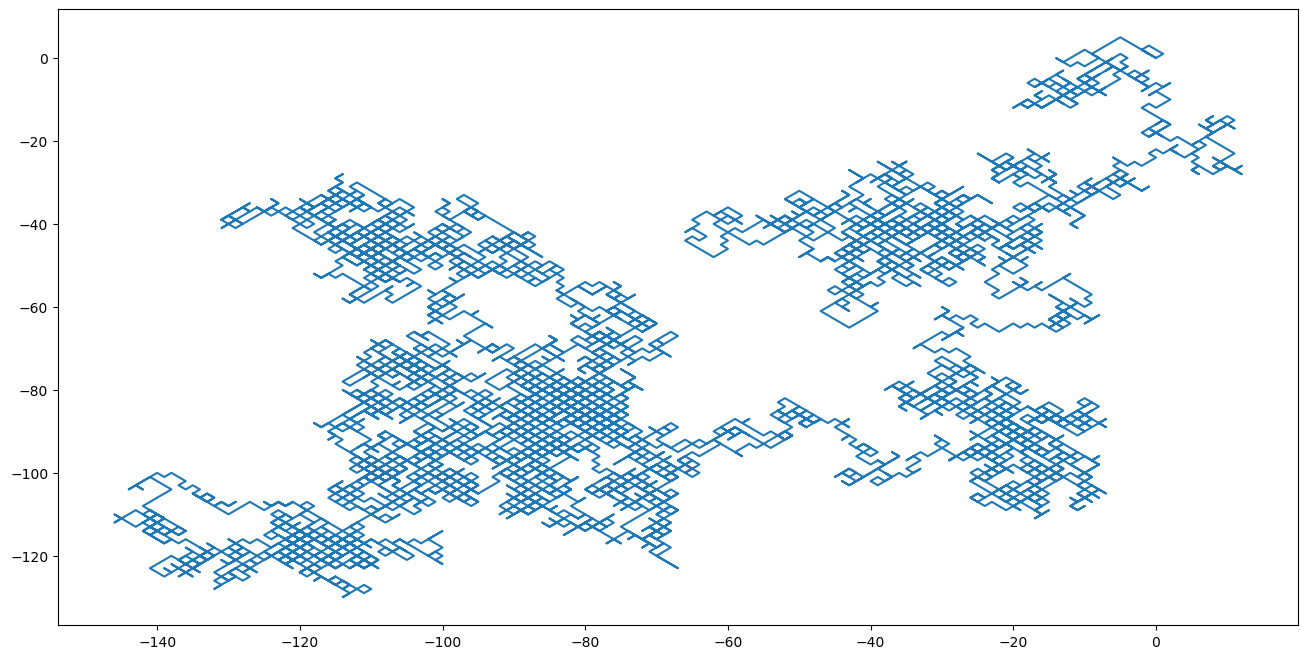

In [541]:
walker_id = -1

plt.figure(figsize = (16, 8))

plt.plot(random_walks[walker_id][0], random_walks[walker_id][1])

plt.show()